In [1]:
import geopandas as gpd

rivers = gpd.read_file("../../Nature/rivers/data/rivers/aus/a00000009.gdbtable")

print(rivers)

        HYRIV_ID  NEXT_DOWN  MAIN_RIV  LENGTH_KM  DIST_DN_KM  DIST_UP_KM  \
0       50000001   50000003  50000003       1.59         1.5         3.0   
1       50000002   50000003  50000003       5.04         1.3         7.9   
2       50000003          0  50000003       1.07         0.0         9.0   
3       50000004          0  50000004       1.28         0.0         3.5   
4       50000005          0  50000005       2.68         0.0         4.5   
...          ...        ...       ...        ...         ...         ...   
836467  50836468   50836467  50836467       1.23         1.1         3.4   
836468  50836469          0  50836469       0.94         0.0         2.4   
836469  50836470          0  50836470       1.47         0.0         3.0   
836470  50836471          0  50836471       0.80         0.0         2.6   
836471  50836472          0  50836472       1.47         0.0         2.7   

        CATCH_SKM  UPLAND_SKM  ENDORHEIC  DIS_AV_CMS  ORD_STRA  ORD_CLAS  \
0          

In [2]:
aus_rivers = rivers.loc[rivers['ORD_FLOW'] < 7]

In [3]:
aus_rivers = aus_rivers[['HYRIV_ID', 'NEXT_DOWN', 'MAIN_RIV', 'LENGTH_KM', 'DIST_DN_KM', 'DIST_UP_KM', 'CATCH_SKM', 'UPLAND_SKM', 'ENDORHEIC', 'DIS_AV_CMS', 'ORD_STRA', 'ORD_CLAS', 'ORD_FLOW', 'HYBAS_L12', 'Shape_Length', 'geometry']]

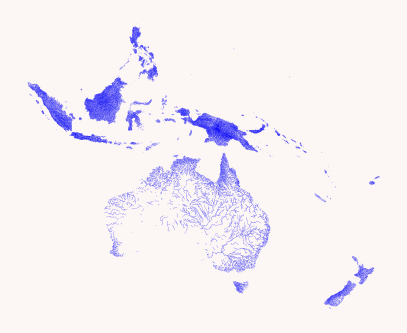

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(5, 7)

aus_rivers.plot(ax=ax, color='blue', lw=0.1)

ax.axis('off')

plt.savefig("outputs/aus1.png", dpi=600, bbox_inches='tight')
plt.show()

In [5]:
import pandas as pd

basins = pd.concat([gpd.read_file("../../Nature/rivers/data/basins/asia/hydrobasins_asia.shp"),
                    gpd.read_file("../../Nature/rivers/data/basins/europe/hydrobasins_europe.shp"),
                    gpd.read_file("../../Nature/rivers/data/basins/aus/hydrobasins_austpacific.shp")])

<AxesSubplot:>

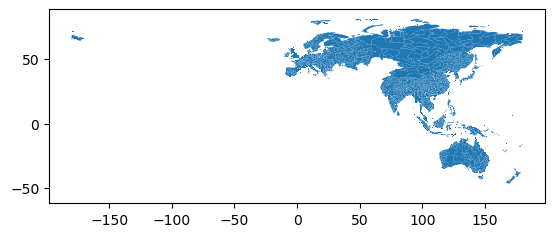

In [6]:
basins.plot()

In [7]:
rivers_basins = gpd.sjoin(aus_rivers, basins, op='within')

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [8]:
rivers_basins_copy = rivers_basins.copy()

In [9]:
import pandas as pd

colours_i_like = ['#ff00ff', 
                  '#483d8b', 
                  '#ffa500', 
                  'green', 
                  'blue',
                  '#dc143c', 
                  'blue', 
                  '#483d8b', 
                  '#000080',
                  '#3cb371',
                  '#875692', 
                  '#2f4f4f', 
                  'crimson', 
                  '#ff00ff', 
                  'darkgreen', 
                  '#db7093',
                  '#ffa500', 
                  'blue', 
                  '#ee82ee',
                  'crimson', 
                  '#483d8b', 
                  'black',
                  '#808000', ]

print(colours_i_like)
print(rivers_basins_copy.MAJ_NAME.unique().tolist())

colors_df = pd.DataFrame({'basin': rivers_basins_copy.MAJ_NAME.unique().tolist(), 'colors': colours_i_like})
rivers_basins_copy = pd.merge(rivers_basins_copy, colors_df, left_on='MAJ_NAME', right_on='basin', how='left')

res = {}

for key, value in zip(rivers_basins_copy.MAJ_NAME.unique().tolist(), colours_i_like):
    res[key] = value
    
print(res)

['#ff00ff', '#483d8b', '#ffa500', 'green', 'blue', '#dc143c', 'blue', '#483d8b', '#000080', '#3cb371', '#875692', '#2f4f4f', 'crimson', '#ff00ff', 'darkgreen', '#db7093', '#ffa500', 'blue', '#ee82ee', 'crimson', '#483d8b', 'black', '#808000']
['Philippines', 'North Marina Islands and Guam', 'Palau and East Indonesia', 'North Borneo Coast', 'Micronesia', 'Sumatra', 'Kalimantan', 'Sulawesi', 'Irian Jaya Coast', 'Papua New Guinea Coast', 'Sepik', 'Fly', 'Java - Timor', 'Solomon Islands', 'Australia, North Coast', 'South Pacific Islands', 'Australia, Interior', 'Australia, East Coast', 'Australia, West Coast', 'Murray - Darling', 'Australia, South Coast', 'New Zealand', 'Tasmania']
{'Philippines': '#ff00ff', 'North Marina Islands and Guam': '#483d8b', 'Palau and East Indonesia': '#ffa500', 'North Borneo Coast': 'green', 'Micronesia': 'blue', 'Sumatra': '#dc143c', 'Kalimantan': 'blue', 'Sulawesi': '#483d8b', 'Irian Jaya Coast': '#000080', 'Papua New Guinea Coast': '#3cb371', 'Sepik': '#8756

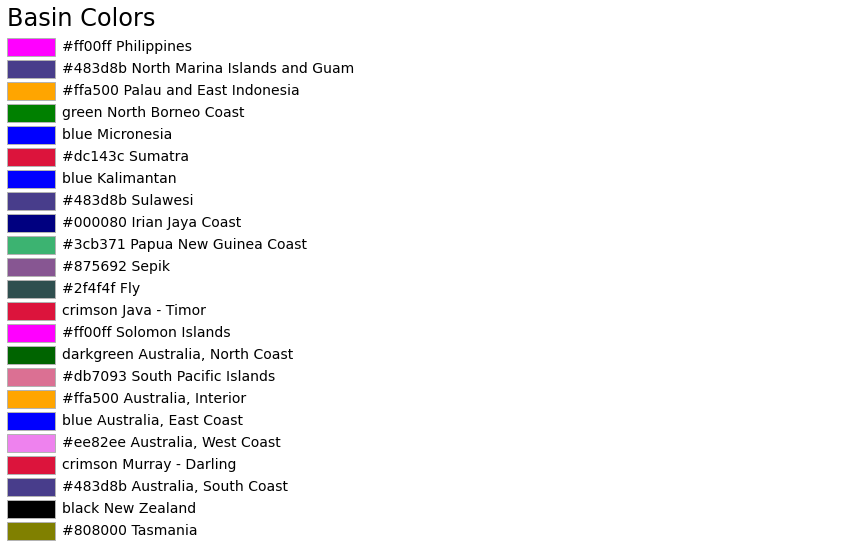

In [10]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


cell_width = 212
cell_height = 22
swatch_width = 48
margin = 12
topmargin = 40

n = len(colors_df.colors)
ncols = 1
nrows = len(colors_df.colors)
width = cell_width * 4 + 2 * margin
height = cell_height * nrows + margin + topmargin
dpi = 72

fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
fig.subplots_adjust(margin/width, margin/height,
                    (width-margin)/width, (height-topmargin)/height)
ax.set_xlim(0, cell_width * 4)
ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.set_axis_off()
ax.set_title("Basin Colors", fontsize=24, loc="left", pad=10)

for i, (name, basin) in enumerate(zip(colors_df.colors, colors_df.basin)):
    row = i % nrows
    col = i // nrows
    y = row * cell_height

    swatch_start_x = cell_width * col
    text_pos_x = cell_width * col + swatch_width + 7

    ax.text(text_pos_x, y, (name + " " + basin), fontsize=14,
            horizontalalignment='left',
            verticalalignment='center')

    ax.add_patch(
        Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                  height=18, facecolor=name, edgecolor='0.7')
    )


C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\geopandas\plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


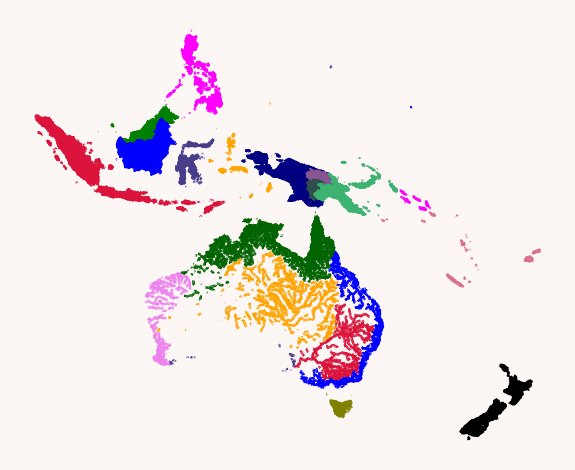

In [11]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
rivers_basins_copy.plot(ax=ax, column='MAJ_NAME', edgecolor='face', color=rivers_basins_copy['colors'])
ax.axis('off')
plt.tight_layout()

In [12]:
logo = plt.imread('../../Branding/light_logo_1.png')

In [13]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = "gabriola"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

In [14]:
import numpy as np

def scale_lw(df: gpd.GeoDataFrame, column_name: str, min_value: float, max_value: float):
    leftSpan = np.amax(df[column_name]) - np.amin(df[column_name])
    rightSpan = max_value - min_value
    valueScaled = (df[column_name] - np.amin(df[column_name])) / leftSpan
    df[f'LW_{column_name}'] = min_value + (valueScaled * rightSpan)
    return df

rivers_basins_copy = scale_lw(rivers_basins_copy, 'DIST_UP_KM', min_value=0.02, max_value=0.4)
rivers_basins_copy = scale_lw(rivers_basins_copy, 'LENGTH_KM', min_value=0.03, max_value=0.4)
rivers_basins_copy = scale_lw(rivers_basins_copy, 'CATCH_SKM', min_value=0.03, max_value=0.4)
rivers_basins_copy = scale_lw(rivers_basins_copy, 'DIS_AV_CMS', min_value=0.03, max_value=0.4)
rivers_basins_copy = scale_lw(rivers_basins_copy, 'UPLAND_SKM', min_value=0.03, max_value=0.4)


rivers_basins_copy['LW_DIST_UP_KM'] = rivers_basins_copy['LW_DIST_UP_KM'] * 2

In [15]:
from shapely.ops import unary_union


gdf = gpd.read_file('../../PythonMapsData/NaturalEarth/10m_cultural/ne_10m_admin_0_countries.shp')
indonesia = gdf.loc[gdf['SOVEREIGNT'] == 'Indonesia']
malaysia = gdf.loc[gdf['SOVEREIGNT'] == 'Malaysia']
Polygons = list(malaysia.iloc[0].geometry)
malaysia.geometry = [Polygons[2]]

oceania = gdf.loc[gdf['CONTINENT'] == 'Oceania']
philipines = gdf.loc[gdf['SOVEREIGNT'] == 'Philippines']
oceania = pd.concat([oceania, indonesia, philipines, malaysia])
x = unary_union(oceania.geometry.tolist())
y = x.boundary
oceania = gpd.GeoDataFrame(pd.DataFrame({'name': ['oceania']}), crs="EPSG:4326", geometry=[y])

C:\Users\symmy\AppData\Local\Temp\ipykernel_1296\129505067.py:7: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  Polygons = list(malaysia.iloc[0].geometry)
C:\Users\symmy\AppData\Local\Temp\ipykernel_1296\129505067.py:7: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  Polygons = list(malaysia.iloc[0].geometry)
C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

<AxesSubplot:>

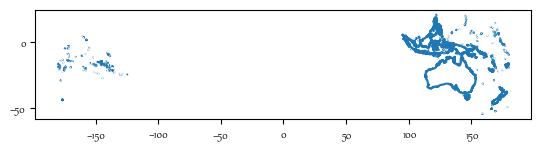

In [16]:
oceania.plot()

C:\Users\symmy\AppData\Local\Temp\ipykernel_1296\3478499747.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


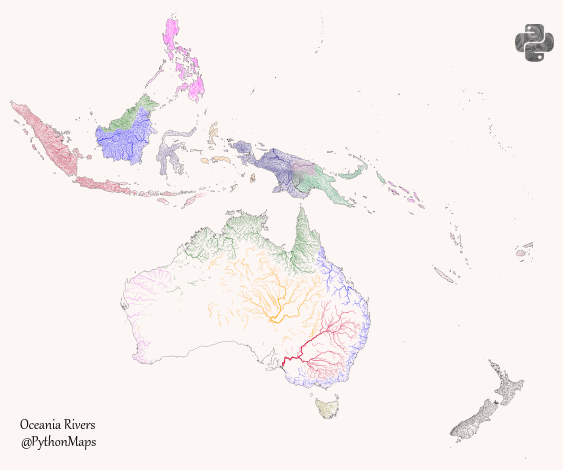

In [23]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')


rivers_basins_copy.plot(ax=ax, edgecolor='face', color=rivers_basins_copy['colors'], lw=rivers_basins_copy['LW_DIST_UP_KM'])
oceania.plot(ax=ax, color="black", lw=0.1)
ax.set_xlim(95, 180)
ax.set_ylim(-50, 20)
newax = fig.add_axes([0.86, 0.86, 0.08, 0.08], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.03, "Oceania Rivers \n@PythonMaps",
              size=12,
              color='black',
              transform = ax.transAxes)
ax.axis('off')
plt.tight_layout()
plt.savefig("outputs/aus_website.jpeg", dpi=600, bbox_inches='tight')
plt.show()

C:\Users\symmy\AppData\Local\Temp\ipykernel_1296\4157780497.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


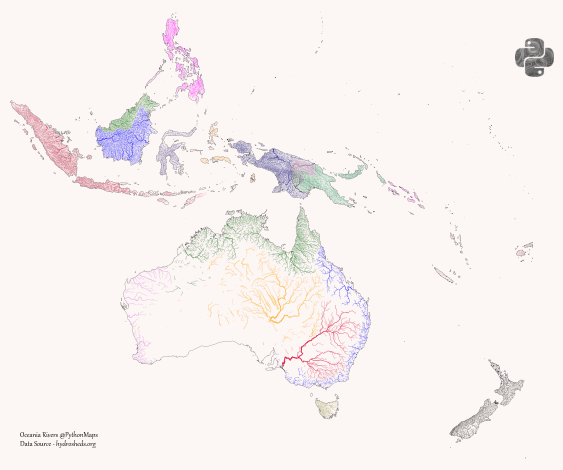

In [18]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')


rivers_basins_copy.plot(ax=ax, edgecolor='face', color=rivers_basins_copy['colors'], lw=rivers_basins_copy['LW_DIST_UP_KM'])
oceania.plot(ax=ax, color="black", lw=0.1)
ax.set_xlim(95, 180)
ax.set_ylim(-50, 20)
newax = fig.add_axes([0.86, 0.83, 0.08, 0.08], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.03, "Oceania Rivers @PythonMaps\nData Source - hydrosheds.org",
              size=6,
              color='black',
              transform = ax.transAxes)
ax.axis('off')
plt.tight_layout()
plt.savefig("outputs/ausvc.png", dpi=1000, bbox_inches='tight')
plt.show()

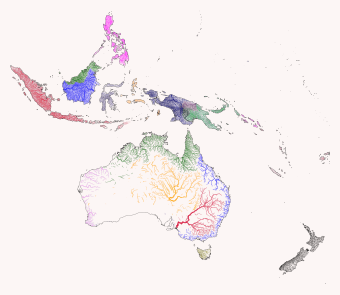

In [19]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(3.5, 7)

rivers_basins_copy.plot(ax=ax, edgecolor='face', color=rivers_basins_copy['colors'], lw=rivers_basins_copy['LW_DIST_UP_KM'])
oceania.plot(ax=ax, color="black", lw=0.1)
ax.set_xlim(95, 180)
ax.set_ylim(-50, 20)

ax.axis('off')
plt.tight_layout()
plt.savefig("outputs/aus_prints_low_res.png", dpi=600, bbox_inches='tight')
plt.show()

In [20]:
print(rivers_basins_copy)

        HYRIV_ID  NEXT_DOWN  MAIN_RIV  LENGTH_KM  DIST_DN_KM  DIST_UP_KM  \
0       50000020          0  50000020       0.64         0.0   10.500000   
1       50000023   50000020  50000020       1.27         1.0    9.900000   
2       50000030   50000023  50000020       7.63         2.2    8.600000   
3       50000041          0  50000041       1.27         0.0    6.500000   
4       50000082          0  50000082       0.46         0.0   11.000000   
...          ...        ...       ...        ...         ...         ...   
231403  50836387          0  50836387       5.57         0.0   25.799999   
231404  50836393          0  50836393       4.14         0.0   19.100000   
231405  50836394   50836400  50836400       2.63         2.1   12.400000   
231406  50836400          0  50836400       1.90         0.0   14.200000   
231407  50836411          0  50836411       6.70         0.0   12.000000   

        CATCH_SKM  UPLAND_SKM  ENDORHEIC  DIS_AV_CMS  ...  SUB_AREA  MAJ_AREA  \
0     

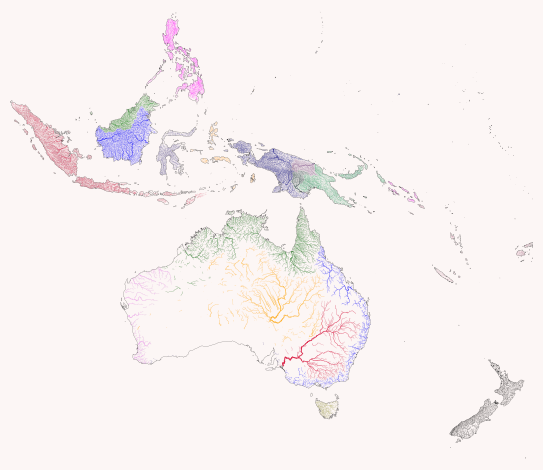

In [21]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')

rivers_basins_copy.plot(ax=ax, edgecolor='face', color=rivers_basins_copy['colors'], lw=rivers_basins_copy['LW_DIST_UP_KM'])
oceania.plot(ax=ax, color="black", lw=0.1)
ax.set_xlim(95, 180)
ax.set_ylim(-50, 20)

ax.axis('off')
plt.tight_layout()
plt.savefig("outputs/aus_prints.png", dpi=5000, bbox_inches='tight')
plt.show()